## Madrid Property Analysis

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Split
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
- This project uses the provided dataset to estimate property prices in Madrid, with a regression model using algorithms seen in class. Then the problem is redifined to create a classification problem. 

#### 2) Data Collection
- Dataset Source - The dataset was provided to us and is located in the data/raw directory. 
- The data consists of 17857 rows and 26 columns.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit


Import the Excel Data as Pandas DataFrame

In [37]:
df = pd.read_excel('../data/raw/session_7_dataset.xlsx')

##### 2.2 Dataset Information

Taking a Quick Look at the Data Structure

In [38]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


In [39]:
df.shape

(17857, 26)

Straight of the bat, we can see we have mix of both categorical and numerical data, and we can also see some NaN's in the first few rows. We will take care of this later, however we also notice we have several features of which we will determine their importance later in the model. In specific, this is what the columns represent:

 - Unnamed: 0: An index or identifier for the rows.
- inm_floor: The floor number on which the property is located.
- inm_size: The size of the property in square meters.
- inm_price: The listing price of the property.
- inm_longitude: The longitude coordinate of the property.
- inm_latitude: The latitude coordinate of the property.
- inm_barrio: The neighborhood name where the property is located.
- inm_distrito: The district name where the property is located.
- his_price: A historical pricing reference for the property.
- his_quarterly_variation: The change in price from the previous quarter.
- his_annual_variation: The change in price from the previous year.
- his_monthly_variation: The change in price from the previous month.
- dem_Indice_de_reemplazo_de_la_poblacion_activa: An index measuring the replacement rate of the working-age population.
- dem_Indice_de_juventud: An index measuring the youthfulness of the population.
- dem_Indice_de_estructura_de_la_poblacion_activa: An index reflecting the structure of the working-age population.
- dem_Indice_de_dependencia: An index measuring the dependency ratio in the population.
- dem_TasaDeParo: The unemployment rate in the area.
- dem_TamanoMedioDelHogar: The average household size.
- dem_PropSinEstudiosUniversitarios: The proportion of the population without university-level education.
- dem_PropSinEstudios: The proportion of the population without any educational qualifications.
- dem_Proporcion_de_nacidos_fuera_de_Espana: The proportion of the population born outside of Spain.
- dem_PropConEstudiosUniversitarios: The proportion of the population with university-level education.
- dem_PobTotal: The total population in the area.
- dem_NumViviendas: The total number of dwellings in the area.
- dem_EdadMedia: The average age of the population in the area.
- dem_Densidad_(Habit/Ha): The population density per hectare in the area.



#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [40]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

Unnamed: 0                                            0
inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                         

From the information above, we can notice that the inm_floor, inm_size, inm_barrio, inm_distrito, dem_PropConEstudiosUniversitarios, and dem_EdadMedia  features have missing values and for the floor its almost 1/6th of the dataset, and for others it's also quite a significant portion, so we will need to take care of this later in the processing. 

##### 3.2 Check Duplicates

In [41]:
df.duplicated().sum()

0

We can see there's no duplicates so we won't need to do anything related to duplicates from the raw dataset. 

##### 3.3 Check Data Types

In [42]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       17857 non-null  int64  
 1   inm_floor                                        14067 non-null  float64
 2   inm_size                                         16090 non-null  float64
 3   inm_price                                        17857 non-null  int64  
 4   inm_longitude                                    17857 non-null  float64
 5   inm_latitude                                     17857 non-null  float64
 6   inm_barrio                                       16063 non-null  object 
 7   inm_distrito                                     16110 non-null  object 
 8   his_price                                        17857 non-null  int64  
 9   his_quarterly_variation     

We can also see from the output above that we have int/float values which are our numerical variables, and we have 2 objects - inm_barrio, inm_distrito. Typically, an object could hold any kind of Python object, but since we loaded this data from an excel file, we know that it must be a text attribute. 

##### 3.4 Checking the number of unique values of each column

In [43]:
df.nunique()

Unnamed: 0                                         17857
inm_floor                                             23
inm_size                                             675
inm_price                                           2340
inm_longitude                                      16013
inm_latitude                                       16104
inm_barrio                                           121
inm_distrito                                          21
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar        

Add an insight here 

##### 3.5 Check statistics of data set

In [44]:
df.describe()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
count,17857.000000,14067.000000,16090.000000,1.785700e+04,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,...,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,16132.000000,17857.000000,17857.000000,16067.000000,17857.000000
mean,8928.000000,2.696453,149.013753,6.964702e+05,-3.688064,40.424817,3993.643389,0.437918,-1.814499,0.035549,...,8.736896,2.487494,0.436518,0.124281,24.851753,0.439830,28281.995296,11515.008960,44.315032,233.372820
std,5155.016214,2.387135,160.485808,8.547274e+05,0.039164,0.031176,1589.895597,2.510048,3.847875,1.533065,...,3.042722,0.300608,0.109068,0.076923,8.542049,0.181168,13117.299282,5322.072109,2.842113,122.653928
min,0.000000,-1.000000,8.000000,1.600000e+04,-3.837697,40.328140,1290.000000,-16.100000,-11.600000,-5.200000,...,3.643735,1.975877,0.246480,0.036422,8.884988,0.072421,2398.000000,872.000000,33.198916,2.267773
25%,4464.000000,1.000000,66.000000,1.899000e+05,-3.708170,40.402633,2578.000000,-1.100000,-4.300000,-0.600000,...,6.291480,2.297491,0.340818,0.062095,18.746056,0.257582,18785.000000,8011.000000,43.161070,155.641754
50%,8928.000000,2.000000,98.000000,3.700000e+05,-3.692498,40.426586,4049.000000,0.500000,-2.200000,0.000000,...,8.076921,2.466320,0.391468,0.085268,23.400147,0.512828,25023.000000,10637.000000,45.113343,228.165728
75%,13392.000000,4.000000,166.000000,8.490000e+05,-3.669516,40.446864,5106.000000,1.900000,-0.100000,0.900000,...,10.802359,2.673612,0.551965,0.191202,31.219133,0.592631,36922.000000,15312.000000,46.244228,322.402577
max,17856.000000,60.000000,2400.000000,1.500000e+07,-3.545674,40.507659,8299.000000,12.200000,17.200000,8.100000,...,18.030112,3.506552,0.641264,0.355659,53.296248,0.699977,67418.000000,26836.000000,49.332035,460.612389


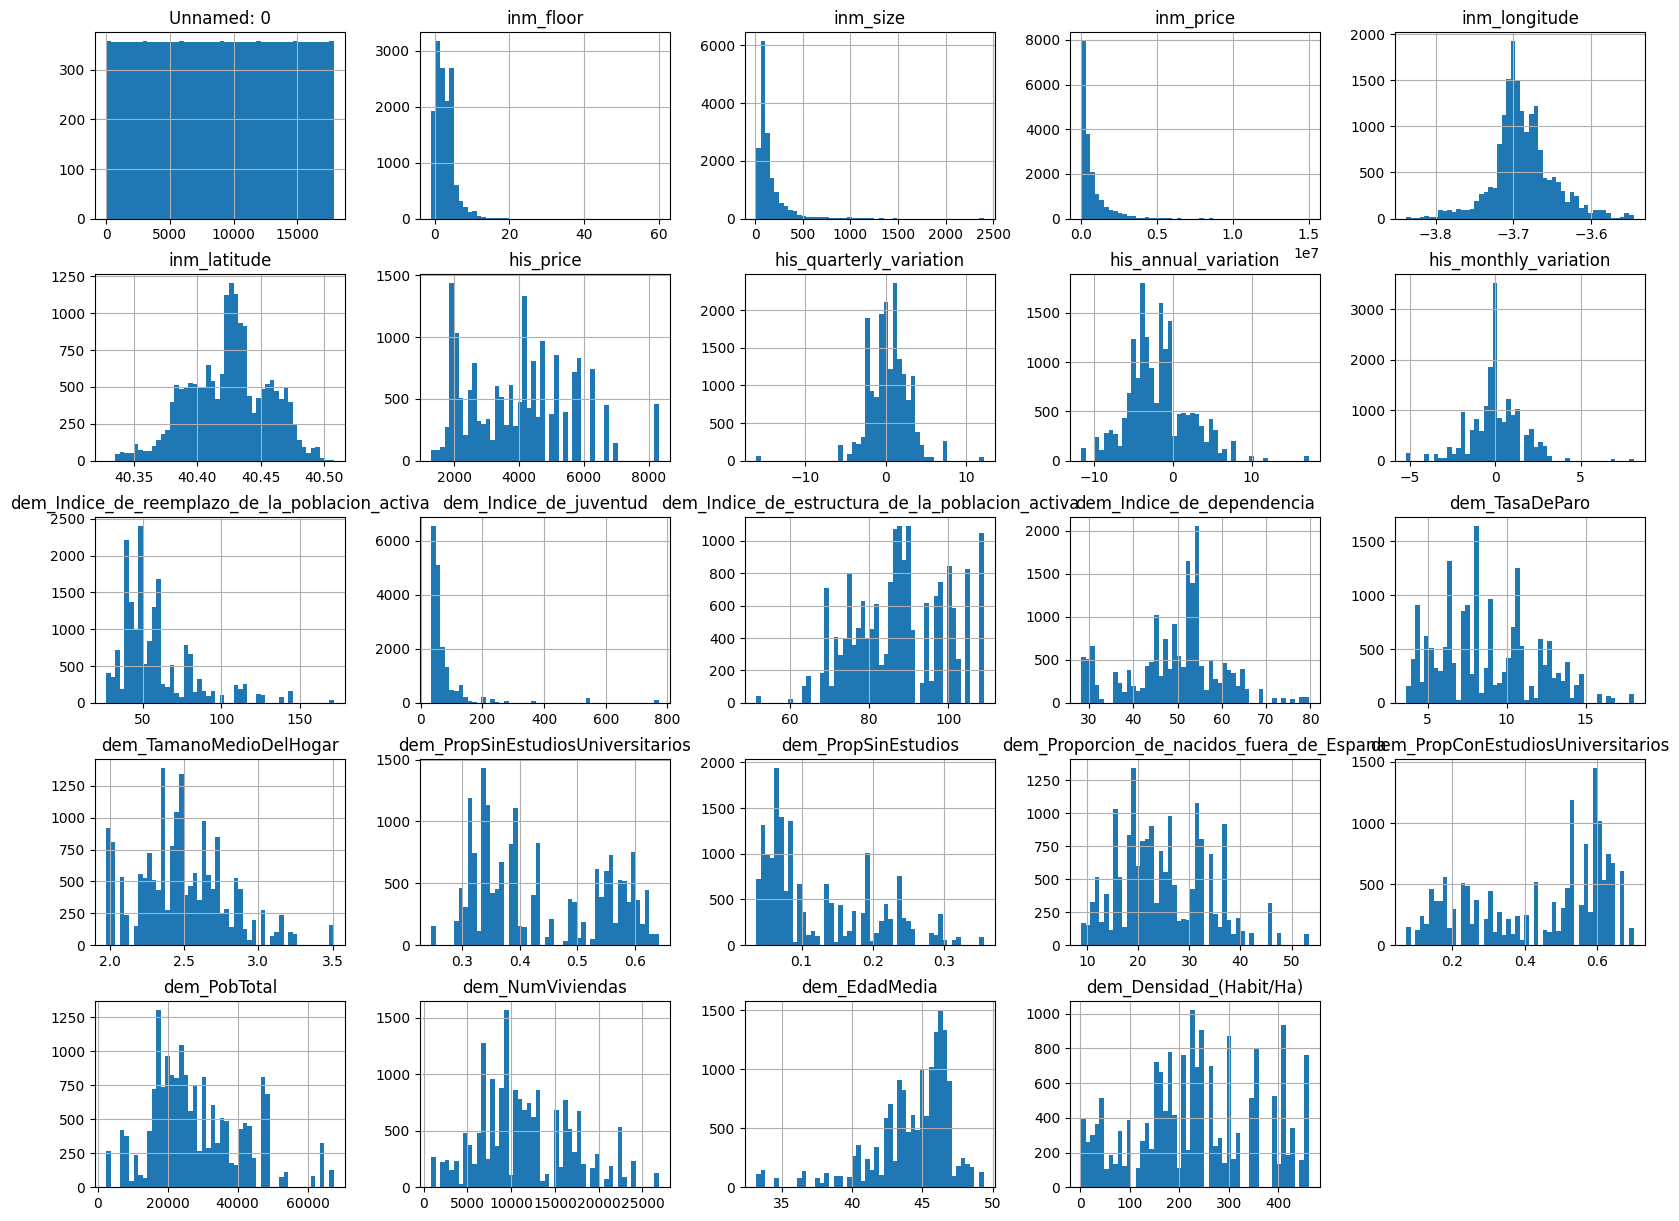

In [45]:
# %matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Here are some inferences we can make from the above histograms and statistical data provided. 

1. These attributes have very different scales, and we will take care of this while doing feature scaling.
2. We also notice that many histograms with the property related variables are tail-heavy: they extend much farther to the right of the median than to the left. We will try transforming these attributes later on to have more bell-shaped distributions. However, the demographic variables mostly seem to have average bell shaped distributions. 
3. The presence of long tails in the histograms for property-related variables indicates potential outliers. We will Identify and handle these outliers for accurate modeling and analysis.

#### 4. Train Test Split


We will be splitting the data into training and testing sets. Spliiting the data at this point will help us to avoid data leakage, data snooping and overfitting.
We will use the training set to train the model and the testing set to evaluate the model.

Typically, we know that the bigger the house, it tends to be more expensive, so we can make an important assumption that property prize is an important variable, and can do stratified sampling based on that. We do this so that our train and test sets have almost equal proportions of the different size categories. If upon making the model, we get that it's not giving good results, we can always change this. However, from the chekcs we performed above, we saw that there are mising values for the size, and we cannot do the stratified sampling split, hence we will take care of the NaN values for just this feature right now, and the rest in the preprocessing stage. From the distribution histogram above of the size, we can see the data is very skewed and there's potential for outliers, so we will do median imputation to take care of that. 

In [46]:
# Calculate the median of the 'inm_size' column
size_median = df['inm_size'].median()

# Replace missing values with the median
df['inm_size'].fillna(size_median, inplace=True)

In [58]:
# Assuming 'df' is your DataFrame and we will use 'inm_size' for stratification
# First, let's create the size categories based on the provided bin edges
df['size_category'] = pd.cut(df['inm_size'],
                             bins=[0, 66, 98, 166, np.inf],
                             labels=[1, 2, 3, 4])

# Drop rows where 'size_category' is NaN, which also drops corresponding NaNs in 'inm_size'
# df = df.dropna(subset=['size_category'])

# Now we perform stratified sampling based on the size category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['size_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# The resulting 'strat_train_set' and 'strat_test_set' will maintain the distribution of property sizes
# Let's check the distribution of the size categories in the stratified train set
print(strat_train_set['size_category'].value_counts(normalize=True))
print(strat_test_set['size_category'].value_counts(normalize=True))

# Save the stratified train and test sets as CSV files
strat_train_set.to_csv('../data/split/stratified_train_set.csv', index=False)
strat_test_set.to_csv('../data/split/stratified_test_set.csv', index=False)

size_category
2    0.322716
1    0.230102
4    0.224151
3    0.223031
Name: proportion, dtype: float64
size_category
2    0.322788
1    0.230123
4    0.224244
3    0.222844
Name: proportion, dtype: float64
